## Indiviual Planning - Edison Hui
**(1) Data Description:**
This project utilizes two data frames: players.csv and sessions.csv. The players.csv file contains 7 variables and 196 observations, providing descriptive characteristics for each signed up player who. I anticipate some challenges with the data. The 'Age' variables contain NA values, which could lead to errors. 

Variables 
* experience - level of understanding with MineCraft - Pro, Veteran, Amateur, Beginner)(chr)
* subscribe (lgl)
* hashedEmail - encrypted email address(chr)
* played_hours - number of hours played on the platform in total(dbl)
* name - first name of player(chr)
* gender - player's gender(chr)
* age - age in years of the player(dbL) 

The sessions.csv file contains 5 variables and 1,535 observations, detailing each individual session a player has participated in on the site. I noticed a challenge with the start and end time variables including both date and time within the same cell, which will complicate data manipulation.

Variables
* hashedEmail - encrypted email address(chr)
* start_time - date and time of start of gameplay(chr)
* end_time - date and time of end of gameplay(chr)
* original_start_time (dbl)
* original_end_time (dbl)

**(2) Question: Can we predict a player's experience level based on the number of sessions and the average session length?**

The response variable of interest is experience, while the explanatory variables include the number of sessions and the average session length. I will analyze session data to determine how many times each player has logged in and calculate average length of each session using the start and end times along with the mean() function. Then, I will employ a classification method to predict players' experience levels based on these two quantitative characteristics.

**(3) Exploratory Data Analysis and Visualization** 

I load required libraries and read both datasets. I use mutate to create columns start_time, end_time, and duration_hour, which becomes average duration.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(lubridate)

players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

head(players)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [7]:
library(dplyr)
library(lubridate)

tidy_sessions <- sessions |>
    mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    duration_hours = as.numeric(difftime(end_time, start_time, units = "hours"))
  )

email_counts <- tidy_sessions |>
  group_by(hashedEmail) |>
  summarise(
    count = n(),
    avg_duration_hours = mean(duration_hours, na.rm = TRUE))

head(email_counts)

hashedEmail,count,avg_duration_hours
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,0.8833333
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,0.5000000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,0.1833333
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13,0.5358974
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2,0.5833333
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,0.1666667


This scatterplot is to find how long people play. It reveals most students play the game for less than an hour on average. Additionally, most students have participated in only a few gameplay sessions.

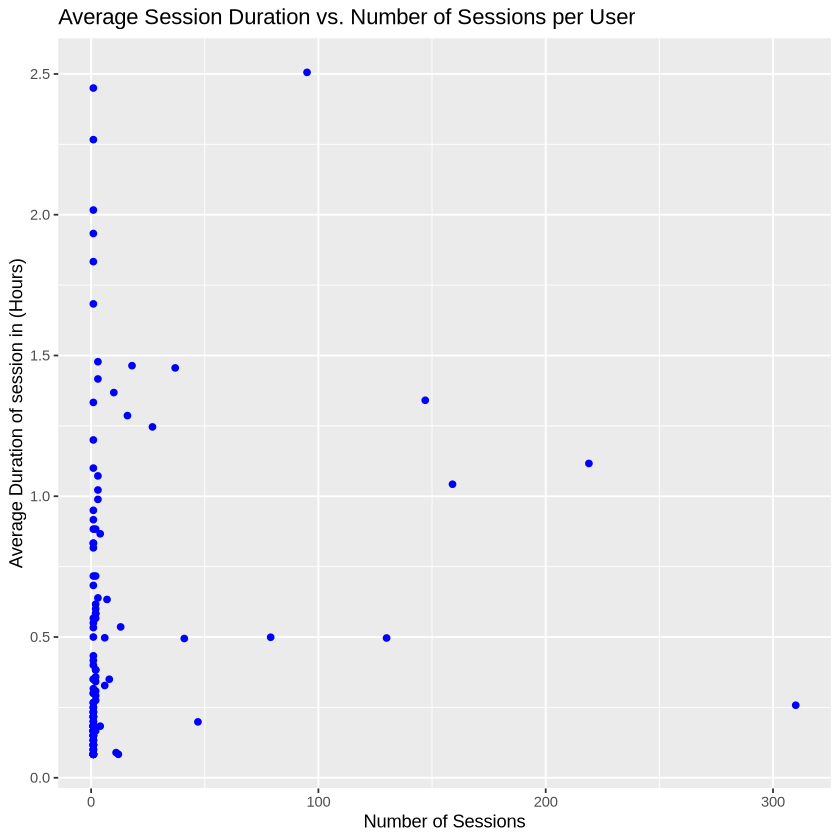

In [8]:
email_plot <- ggplot(email_counts, aes(x = count, y = avg_duration_hours)) +
  geom_point(color = "blue") +
  labs(x = "Number of Sessions",
    y = "Average Duration of session in (Hours)",
    title = "Average Session Duration of Pl vs. Number of Sessions per User")

email_plot

This bar plot illustrates the distribution of experience levels among players, showing very few pro players and a large number of amateur players.

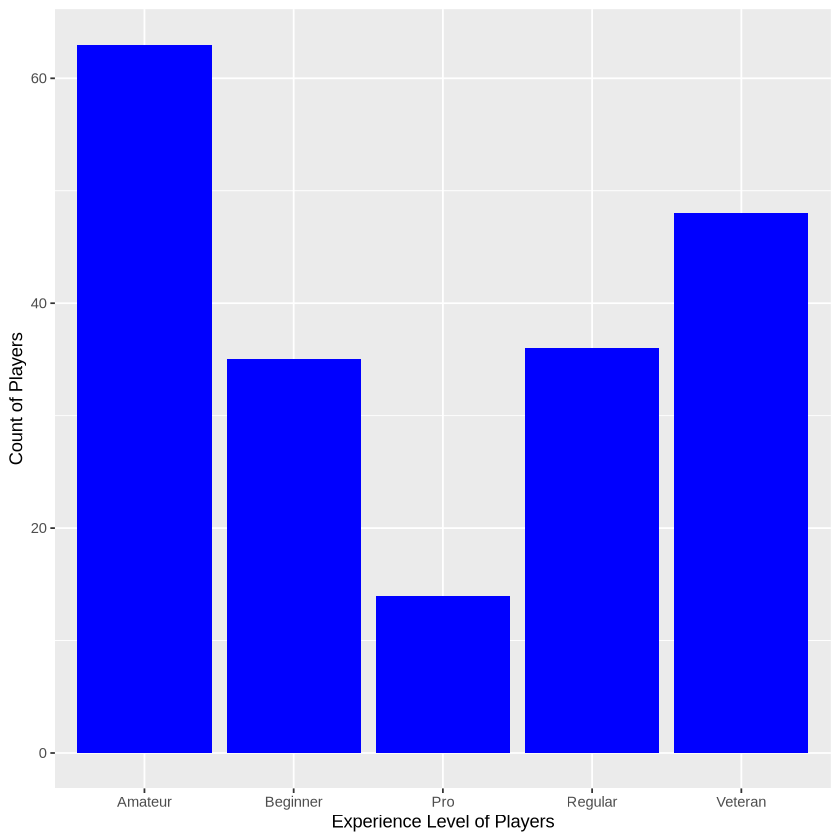

In [9]:
experience_counts <- players |>
  count(experience)

experience_plot <- ggplot(experience_counts, aes(x = experience, y = n)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Experience Level of Players", y = "Count of Players")

experience_plot

**(4) Methods and Plan**

I propose using K-nearest neighbors (KNN) classification to predict a categorical variable. The approach is suitable because we have two numerical variables that we can use to predict a categorical outcome. To create an effective model, we assume a meaningful relationship between the number of sessions, experience level and average game time. I assume that students are accurately assessing their own experience level.

To select the best model, I will evaluate classification accuracy through cross-validation, choosing the optimal number of neighbors for the KNN classifier. 

Data processing steps:

* Splitting the data into training (75%) and test (25%) sets
* Standardizing the training set
* Further splitting the training set into training (75%) and validation (25%) subsets
* Using a 5-fold cross-validation strategy to assess the classifier's accuracy